<strong>License</strong>: BSD<br/>
<strong>Copyright</strong>: Copyright American Gut Project, 2015<br />

In [3]:
# This cell allows us to render the notebook in the way we wish no matter where
# the notebook is rendered.
from IPython.core.display import HTML
css_file = './ag.css'
HTML(open(css_file, "r").read())

<a id="top"></a>
##Table of contents
<ul><li><a href="#intro">Introduction</a>
<ul><li><a href="#toy">Statistical Hypotheses and Error: A “toy” example</a>
</li><li><a href="#math_def">A More Formal Mathematical Definition for Power Analysis</a>
</li><li><a href="#proof">Proof of Principle</a>
</li><li><a href="#caveots">Caveats and Considerations</a>
</li><li><a href="#data_intro">Power Analysis on the American Gut data</a>
</li></ul>
</li><li><a href="#requirements">Notebook Requirements</a>
</li><li><a href="#imports">Function Imports</a>
</li><li><a href="#parameters">Analysis parameters</a>
<ul><li><a href="#params_save">File Saving Parameters</a>
</li><li><a href="#params_text">Text file and Metadata Handling Parameters</a>
</li><li><a href="#params_alpha">Alpha Diversity Parameters</a>
</li><li><a href="#params_beta">Beta Diversity Parameters</a>
</li><li><a href="#params_gen">General Parameters for Power Analysis</a>
</li><li><a href="#params_all">Multiple Body Site Parameters</a>
</li><li><a href="#params_fecal">Fecal Sample Analysis Parameters</a>
</li><li><a href="#params_plot">Plotting Parameters</a>
</li></ul>
</li><li><a href="#ifilepath">Files and Directories</a>
<ul><li><a href="#dir_base">Base and Working Directories</a>
</li><li><a href="#dir_all">All Sample Directory and Files</a>
</li><li><a href="#dir_fecal">Fecal Sample Directories and Files</a>
</li><li><a href="#dir_analysis">Analysis Directories and Files</a>
</li></ul>
</li><li><a href="#downloads">Data Download</a>
</li><li><a href="#map_massage">Metadata Adjustment</a>
</li><li><a href="#pow_bodysite">Multiple Body Site Power Calculation</a>
</li><li><a href="#poop_power">Power Calculation for Fecal Samples</a>
</li><li><a href="#effect_size">Effect Size Estimation</a>
</li><li><a href="#plot">Power Curve Plotting</a>
<ul><li><a href="#plot_alpha">Alpha Diversity</a>
</li><li><a href="#plot_beta">Beta Diversity</a>
</li></ul>
</li><li><a href="#discussion">Discussion</a>
</li><li><a href="#refs">References</a>
</li></ul>

<a id="intro"></a>
# Power Analysis

While null hypothesis statistical testing demonstrates whether something has an effect, effect sizes are used to  estimate the importance of an effect. There have have been many call in medical literature for the inclusion of effect size along with statistical p-values, as effect sizes increase the accuracy of comparison [[1](#17944619), [2](#23997866)]. We can leverage effect sizes within microbiome research in multiple ways. Understanding the effect size may help us rank which factors affect the microbiome the most. This, in turn, could help identify targets for intervention. Effect size can also help us design better studies. In the context of statistical power, effect size can help us estimate how many samples we might need to be reasonably confident that our hypothesis  is true, given some margin of error.

The complex relation between humans and their resident microbes, especially the microbes in their guts, has been recognized in many areas of human health. Our microbial communities change during the course of our lives, although most of this change occurs within the first three years of life [[3](#20668239)-[6](#22797518)]. Long-term dietary patterns also have a large influence on the gut microbiome, although certain extreme dietary changes can force an acute change [[6](#22797518)-[9](#24336217)]. The gut microbiome can also be re-shaped by antibiotic use [[10](#20736229)-[12](#20352091)]. Microbiome alterations (dysbiosis) have also been reported in a number of diseases. Inflammatory bowel disease (IBD) and obesity are well studied examples in which the disease state is associated with dysbiosis [[13](#25307765)-[18](#24009397)]. Seasonal changes in the microbiome have also been reported [[19](#24618913)]. We will demonstrate that in a healthy population of adults, age, alcohol consumption, exercise frequency, and sleep duration also impact the gut  microbiome.

The list of factors that interact with the microbiome is based on the results of significance testing and does not consider effect size. However, effect size is still an important consideration in microbiome research for both experimental design and possible interventions. Using the American Gut data, we  demonstrate that antibiotic use in the month prior to sample collection is associated with significantly decreased alpha diversity, compared with people who have not used antibiotics in the past year (*p* < 0.01). We also show that people who drink alcohol regularly (three or more times per week) have higher alpha diversity than those who do not consume alcohol (*p* < 0.01). 

If these results were published, one can imagine a situation in which popular media might advise the regular consumption of alcohol use following a dose of antibiotics to help repopulate the microbiome. If we ignore the number of logical fallacies associated with this practice and assume that regular alcohol consumption is able to reseed the gut microbiome in a healthy way, the question then becomes if this will be an effective treatment. (Of course, this represents only one of many potential examples, and no real data beyond the significant association between alcohol consumption and microbiome diversity exists to support this mechanism.) Regular alcohol consumption following antibiotic use might be a good treatment strategy, if the effect size of alcohol consumption is on the same order or greater than the effect of antibiotic use. On the other hand, if the effect size of alcohol consumption is less than that of antibiotic use, encouraging adults who do not drink or drink rarely to increase their alcohol consumption may not lead to the desired effects.

The American Gut data set presents a rare opportunity for effect size prediction within the microbiome field. The large size and high degree of heterogeneity among participants and the amount of survey metadata collected from each participant facilitates the examination of effect size for factors that are either currently uncharacterized or under characterized in microbiome research. The accompanying challenge is that effect size calculations are difficult for the type of data collected in microbiome research. Most traditional effect size metrics for comparing samples between groups, such as Cohen’s *d*, make assumptions about the normality of the data being studied, while microbiome data is not normal. As a result, we will leverage a method of empirically estimating statistical power.

<a href="#top">Return to the top</a>

<a id="#toy"></a>
### Statistical Hypotheses and Error: A “toy” example
Using statistics, we can test hypotheses. For example, we might want to test whether or not individual toy bricks cost different amounts depending on which playset they come from. Perhaps we’re trying to build the most epic toy brick playset to represent places where the microbiome is studied, and we’re trying to do this in the cheapest way possible. We’ve determined that there are two relatively inexpensive sets which contain a specific brick we want: a chemistry laboratory and a komodo dragon enclosure. However, we’d also like to repurpose the rest of the bricks in the sets. So, we’d like to consider the cost per brick in each of  the sets.

Therefore, we’re going to test the hypothesis that the cost per brick in the lab playset is different from the cost per brick in the komodo dragon playset. We can write two possible outcomes for our statistical test, and call them hypotheses:
<center><strong>H<sub>0</sub></strong>: The playset type is not related to the cost per brick<br/>
(cost<sub>lab</sub> = cost<sub>dragon</sub>)</center>
<center><strong>H<sub>1</sub></strong>: The playset type is related to the cost per brick<br/>
(cost<sub>lab</sub> $\neq$ cost<sub>dragon</sub>)</center>

In an ideal world, we would be able to collect information about every set sold in the country, which statisticians would call the *population*. But, presumably, this is a side project, and we don’t have enough time or energy to be able to collect information about every single toy brick set of a particular model sold at every single store in the country.
Rather than collect information about every single set in the country, let’s assume that we were able to collect price information the three playsets per  week at three stores across the country during the 2013 calendar year. Let’s call each record of a playset price an *observation*. The total set of observations of each model is a *sample*.

In this notebook, we will try to use consistent language, and a *sample* will refer to a set of *observations* (whether they be the cost of toy brick playsets, randomly drawn data points, dice rolls, or diversity metrics calculated after sequencing physical 16S swabs). This differs slightly from the use of “samples” in other American Gut documentation, where “sample” refers to a physical specimen and the resultant 16S data.

<table style="width: 60%;
             border-collapse:collapse;
             border-style:hidden;
             line-height:120%">
    <tr>
        <td style="text-align:right;
                   background-color:black;
                   color:white">
            Hypothesis $\rightarrow$
        </td>
        <td rowspan="2"; 
            style="text-align:center;
                   font-weight:bold;
                   background-color:black;
                   color:white">
            <strong>Reject H<sub>0</sub></strong><br>
            ($cost_{lab} \neq cost_{dragon}$)
        </td>
        <td rowspan="2"; 
            style="text-align:center;
                   font-weight:bold;
                   background-color:black;
                   color:white">
            <strong>Fail to Reject H<sub>0</sub></strong><br>
            ($cost_{lab} = cost_{dragon}$)
        </td>
    </tr>
    <tr>
        <td style="text-align:left;
                   background-color:black;
                   color:white">
            Truth &darr;
        </td>
    </tr>
    <tr>
        <td style="text-align:center;
                   border-style:hidden;
                  ">
            <strong>$cost_{lab} = cost_{dragon}$</strong>
        </td>
        <td style="text-align:center;
                  border-style:hidden"
                   >
            <center>False Positive</center>
        </td>
        <td style="text-align:center;
                   border-style:hidden
                   ">
            Correct
        </td>
    </tr>
    <tr>
        <td style="text-align:center;
                   border-top:hidden;
                   border-right:hidden;
                   border-left:hidden;
                   border-bottom:2x solid black;
                  ">
            <strong>$cost_{lab} \neq cost_{dragon}$         </strong>
        </td>
        <td style="text-align:center;
                   border-top:hidden;
                   border-left:hidden;
                   border-right:hidden;
                   border-bottom:2x solid black;
                   ">
            Correct
        </td>
        <td style="text-align:center;
                   border-top:hidden;
                   border-left:hidden;
                   border-right:hidden;
                   border-bottom:2x solid black;
                   ">
            False Negative
        </td>
    </tr>
</table>

Our statistical test can make a mistake in two ways. We can reject <strong>H<sub>0</sub></strong> when it is, in fact, true. This leads to a false positive. In our toy example, this would be drawing the conclusion that the bricks within the two sets cost significantly different amounts, when in fact, they don’t. In a medical context, this might mean saying that someone has cancer, when in fact, they do not. Statisticians try to limit the risk associated with false positives by selecting a critical value, sometimes called $\alpha$. The critical value is the acceptable probability that a false positive has occured. Statistical tests calculate a *p* value, which is the probability a false positive has occurred. The comparison of *p* values and critical values prompts rejection, or failure to reject a hypothesis. The null hypothesis is rejected when $p < \alpha$.

We can also make a mistake and fail to reject <strong>H<sub>0</sub></strong> when it is true. In the toy example, this would mean that we conclude that the costs of the bricks in the two set are the same, when they actually have different costs. We have committed a Type II error or selected a false negative result. In the cancer example, it would mean saying a patient is cancer free when they actually have the disease. This is also dangerous, but more difficult to test. The statistical power of an experiment is <br/><center>1 – (probability of a false negative)</center>Effect size is related to the rates of both false positives and false negatives, along with the number of samples present.

<a href="#top">Return to the top</a>

<a id="math_def"></a>
### A More Formal Mathematical Defination for Power Analysis
Traditionally, statistical power can only be calculated for certain types of data and certain statistical tests. Most effect size measures make assumptions about the distribution of the data (for example, Cohen’s $f^{2}$ is the power of an ANOVA, which assumes a normal distribution) [[20](#Cohen), [21](#Zar)]. Unfortunately, most microbiome data violates one or more traditional assumptions. For example, many bacterial taxa are sparsely represented and therefore do not follow a normal distribution [[22](#23284876)]. One approach to overcome problems associated with non-normal distributions is to use permutations [[23](#Bondini)]. We have applied a permutative approach to empirically estimate power for microbiome data.

####Defination
Let's assume there exist a set of populations, $\{ K_{1}, K{2}, ...  , K_{k} \}$ which can be characterized by some parameter, $\chi$ such that $\chi_{1} \neq \chi_{2} \neq ... \neq \chi_{k}$. From each of these populations, there exist samples, $\{ S_{1}, S_{2}, ... , S_{k} \}$ of sizes $N_{1}, N_{2}, ... , N_{k}$ and characterized by some parameter,  $X$ where $X \approx \chi$.
For our set of samples, we can apply some statistical test, $\mathbf{F}$, to test the pair of hypotheses:
$$\textrm{H}_{\textrm{0}}\textrm{:  } \chi_{1} = \chi_{2} = ... = \chi_{k}$$
$$\textrm{H}_{\textrm{1}}\textrm{:  } \chi_{1} \neq \chi_{2} \neq ... \neq \chi_{k}$$
Let's assume that when we apply $\mathbf{F}$ to our set of samples, it gives us a probability, $p_{all}$ where $p_{all}$ is the probability that we have committed a Type I Error. We can set some critical value, $\alpha$ such that we reject <strong>H<sub>0</sub></strong> if $p_{all} < \alpha$.

If $N_{i}$ is sufficiently large, we can randomly subsample $S_{i}$ to generate $s_{i}$, a subsample of size $n_{i}$ where $n_{i} < N_{i}$. Each subsample will have a parameter, $x_{i}$, where $x_{i} \approx X_{i}$, and by the transitive property, $x_{i} \approx \chi_{i}$.<br>
If we subsamples over all our sample set, we can apply our test $\mathbf{F}$ to $m$ rounds of random subsampling to generate a set of $p$ values, $\{p_{1}, p_{2}, ..., p_{m}\}$.

Since we know that we should reject the null hypothesis at the critical value, $\alpha$, when $p_{j} \geq \alpha \textrm{ (for }\{j | j \textrm{ } \epsilon \textrm{ }\mathbb{N} \textrm{ and } 1 \leq j \leq m\}$, we have observed a false negative and committed a type II error. We can define the empirical probability of committing a type II error, $\beta$, as
$$\beta = \frac{|p_{j} > \alpha|}{p} \tag{1}$$
where $|a|$ is the number of elements in set $a$.
Since statistical power, $P$ is defined as $1 - \beta$, we can say that 
$$P = 1 - \beta = 1 - \frac{|p_{j} \geq \alpha|}{|p|} = \frac{|p_{j} < \alpha|}{|p|} \tag{2}$$

If we repeat the subsampling process $g$ times, the central limit theorem applied to weak convegence says the mean of the power estimate, $\overline{P} \rightarrow P$.

<a href="#top">Return to the top</a>

<a id="principle"></a>
### Proof of Principle

The method of power analysis we’re using here is a relatively new method. We wanted to demonstrate the empirical method gives similar results as those obtained using traditional power analysis techniques. We applied a [case II student’s t-test](http://en.wikipedia.org/wiki/Student's_t-test#Independent_.28unpaired.29_samples), which compares the hypotheses,
<center><strong>H<sub>0</sub></strong>: $\mu_{1} = \mu_{2}$<br>
<strong>H<sub>1</sub></strong>: $\mu_{1} \neq \mu_{2}$</center>
where $\mu$ is the mean of a normal distribution.

The power for this test is given by
$$PWR(\overline{x}_{1}, \overline{x}_{2}, s_{1}, s_{2}, n_{1}, n_{2}, \alpha) = pnorm \left (-z_{1 - \alpha/2} + \sqrt{\frac{(\overline{x}_{1} - \overline{x}_{2})^{2}}{s_{1}^{2}/n_{1} + s_{2}^{2}/n_{2}}}, 0, 1 \right ) \tag{3}$$
where $pnorm(x, 0, 1)$ is the probability density function of $x$ within a normal distribution with a mean of 0 and a standard deviation of 1.

We simulated two normal distributions with the same standard deviation. The difference between the two means was half the standard deviation. We generated samples and subsamples of equal size from these populations. This allows us to simplify our power equation to
$$PWR(\overline{x}_{1}, \overline{x}_{2}, s_{1}, s_{2}, n, \alpha) = pnorm \left (-z_{1 - \alpha / 2} +  \sqrt{\frac{n * (\overline{x}_{1} + \overline{x}_{2})^{2}}{s_{1}^{2} + s_{2}^{2}}}, 0, 1\right ) \tag{4}$$

We drew samples of 25, 50, 100, and 1000 observations from each of the two distributions, and compared the results using a t-test. The 95% rejection level is highlighted on each of the distributions by shading values above this level gray. The samples were used to generate power curves three ways. First, curves were generated using the traditional equation for power analysis (solid line). Next, an empirical power was calculated for each sample by drawing subsamples of different sizes (blue circles). A mean effect size was calculated for the empirical power, and this was used to extrapolate a power curve (dashed blue line). 

![sample power comparison](https://github.com/biocore/American-Gut/blob/master/ipynb/images/power_subsample.png?raw=true)

There is fairly good agreement between the traditional and elucidated power curves, especially at higher power levels. By 50% power, the two curves are within 10% window of each other (the extrapolated curve overestimates power at lower sample sizes). As a first pass for effect size estimation, empirical power and extrapolated power curves are a reliable method which accurately estimate the statistical power. These are an improvement on currently available methods, especially for nonparametric data.

![power result comparison](https://github.com/JWDebelius/biocore/blob/master/ipynb/images/normal_power_comparison.png?raw=true)

<a href="#top">Return to the top</a>

<a id="caveots"></a>
### Caveats and Considerations
The power analysis we’re performing here assume the following things about our data and statistical tests:

1. The samples are a representative, random sample of the underlying population.

2. Samples are sufficiently large to allow random subsampling at a depth that facilitates power analysis. For some statistical tests, a subsample of less than 5 observations per group may not be appropriate.

3. There is a significant difference between the samples, or reason to believe there is a significant difference between the populations.

4. Samples satisfy any requirements of the statistical test, $\textbf{F}$. These may include things like a requirement the data follow a distribution.

<a href="#top">Return to the top</a>

<a id="#data_intro"></a>
### Groups and Calculations

In this notebook, we will look at the effect size of nine metadata categories on the human gut microbiome through alpha and beta diversity. We will also include the comparison of gut samples and skin samples as a control, since it is widely accepted in the field that body site has the largest effect on adult human microbial communities [[24](#22699609)]. We will pick the two most extreme states within a metadata category, since we know that most categories involve a continuum, and more extreme states will be more likely to show the effect.

This analysis will focus on the following metadata categories and states
* Body Site (feces vs hand)
* Inflammatory bowel disease (people with IBD vs. those without)
* Antibiotic use (people who have used antibiotics in the past week or month vs. people who have not used them for more than a year prior to sample collection)
<br/>We will combine these two categories into a group we’ll refer to as “In the past month”.
* Types of plants eaten in a week (less than 5 types of plants vs. more than 30 types of plants)
Age (20s vs. 60s)
* Body mass index (normal vs. obese)
* Collection season (summer vs. winter)
* Frequency of Alcohol Consumption (never vs. daily)
* How frequently an individual exercises (never or rarely vs. daily)
* The number of hours of sleep a participant gets per night (less than six vs. more than eight)

To reduce some of the noise within the data, we will focus on samples in which other metadata categories have been controlled. So, each sample pair in a category above will be matched based on the following metadata categories:
* Body site
* IBD status (IBD or not)
* Antibiotic use
* Number of types of plants consumed in a week
* Diabetes diagnosis
* Age by decade
* Collection season
* Hours of sleep per night

<a href="#top">Return to the top</a>

<a id="requirements"></a>
## Notebook Requirements
* [Python 2.7.3](https://www.python.org/download/releases/2.7/)
* [Qiime 1.9](https://www.qiime.org/install/install.html)
* [h5py](http://www.h5py.org) and [hdf5](http://www.hdfgroup.org/HDF5/).<br> These are required to read the American Gut tables.
* [Jinja2](http://jinja.pocoo.org/docs/dev/), [pyzmq](https://learning-0mq-with-pyzmq.readthedocs.org/en/latest/),  [tornado](http://www.tornadoweb.org/en/stable/) and [jsonschema](http://json-schema.org) <br/>These are required to open a local IPython notebook instance. They are not installed automatically when you install IPython as a dependency for Qiime.
* [IPython 3.0](http://ipython.org)
* [Statsmodels 0.6.0](http://statsmodels.sourceforge.net)
* [American Gut Python Library](https://github.com/biocore/American-Gut)
* $\LaTeX$. [LiveTex](http://www.tug.org/texlive/) offers one installation solution.

<a href="#top">Return to the top</a>

<a id="imports"></a>
## Function Imports
We can start by importing functions we’ll need from other libraries.

In [4]:
import os
import shutil
import copy
import pickle

import numpy as np
import scipy
import skbio
import matplotlib.pylab as plt
import pandas as pd

import americangut.power_plots as pp
import americangut.diversity_analysis as div_an

from IPython.display import HTML
from matplotlib import rcParams

from biom import load_table
from skbio.stats.power import subsample_paired_power

We will also set up some plotting parameters so the generated figures use Helvetica or Arial as their default font. For more on font properties, see the matplotlib documentation on [text objects](http://matplotlib.org/api/text_api.html?highlight=font#matplotlib.text.Text.set_fontproperties) and [rendering text with $\LaTeX$](http://matplotlib.org/users/pgf.html?highlight=font). We will also prompt the IPython notebook to display the images we generate live in the notebook.

In [5]:
# Displays images inline
%matplotlib inline

# Sets up plotting parameters so that the default setting is use to Helvetica
# in plots
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Helvetica', 'Arial']
rcParams['text.usetex'] = True

<a href=#top>Return to the top</a>

<a id="parameters"></a>
## Analysis Parameters
We can also set some necessary parameters for handling files and this analysis. It’s easier to set them as a block, here, so that our systems are consistent than it is to modify each of the variables later in the import if our needs or our data change.

<a id="params_save"></a>
## File Saving Parameters
In the course of this analysis, a series of files can be generated. The File Saving Parameters determine whether new files are saved.
<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>overwrite</strong><br />(boolian)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            <p>When <strong><code>overwrite</code></strong> is 
            <code style="color:ForestGreen">True</code>, new files will be 
            generated and saved during data processing. It is recommended 
            that overwrite be set to 
            <code style="color:ForestGreen">False</code>, 
            in which case new files will 
            only be generated when the file does not exist. This 
            substantially decreases analysis time.</p>
            <p>Overwrite will also cause the notebook to generate new 
            power calculations, even if the files do not exist. Whether or 
            not these power calculation results are saved can be 
            controlled by setting 
            <strong><code>save_intermediates</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>save_intermediates</strong><br>(boolian)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The current power code is computationally expensive and takes 
            a long time to compute, due to the iterative nature. While 
            code optimization may come in the future, it can be 
            advantageous to save the power calculation results somewhere, 
            to they can be retrieved later.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>save_images</strong><br>(boolian)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            This notebook will generate images of the power curves. By 
            default, these will be displayed inside the notebook. However, 
            some users also find it advantageous to save the images files. 
            The file format is set in 
            <strong><code><a href="#dir_analysis">image_pattern</a></code></strong>.
        </td>
    </tr>
</table>

In [6]:
overwrite = False
save_intermediates = True
save_images = True

<a href="#top">Return to the top</a>

<a id="params_text"></a>
## Metadata and File Handling Parameters
QIIME-formatted metadata and results files are frequently tab-separated text (.txt) files. These files can be opened in Excel or spreadsheet programs. You can learn more about QIIME mapping files [here](http://qiime.org/documentation/file_formats.html). We use the Pandas library to read most of our text files, which provides some spreadsheet-like functionalities.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>txt_delim</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            <strong><code>txt_delim</code></strong> specifies the way 
            columns are separated in the files. QIIME typically consumes 
            and produces tab-delimited 
            (<code><font color="FireBrick">"\t"</font></code>) 
            text files (.txt) for metadata and results generation.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>map_index</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The name of the column containing the sample id name. In 
            QIIME, this column is called  
            <code><font color="FireBrick">#SampleID</font></code>.
        </td>
    <tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>map_nas</strong><br/>(list of strings)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            It is possible a mapping file map be missing values, since 
            American Gut participants are free to skip any question. The 
            pandas package is able to omit these missing samples from 
            analysis. In raw American Gut files, missing values are 
            typically denoted as 
            <code><font color="FireBrick">“NA”</font></code>, 
            <code><font color="FireBrick">“no_data”</font></code>, 
            <code><font color="FireBrick">“unknown”</font></code>, 
            and empty spaces (<code><font color="FireBrick">“”</font></code>).
        </td>
    <tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>write_na</strong><br/> (string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The value to denote missing values when text files are written 
            from Pandas data frames. Using an empty space, 
            (<code><font color="FireBrick">“”</font></code>) will allow 
            certain QIIME scripts, like 
            [group_signigance.py](http://qiime.org/scripts/group_significance.html), 
            to ignore the missing values.
        </td>
    <tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>date_cols</strong><br/> (list of strings)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            Temporal data can be identified using the 
            <strong><code>date_cols</code></strong>.
        </td>
    <tr>
</table>

In [7]:
txt_delim = '\t'
map_index = '#SampleID'
map_nas = ['NA', 'no_data', 'unknown', '']
write_na = ''
date_cols = ['RUN_DATE', 'COLLECTION_DATE', 'BIRTH_DATE', 'SAMPLE_TIME']

<a href="#top">Return to the top</a>

<a id="params_alpha"></a>
### Alpha Diversity Parameters

This notebook will generate power curves for metrics associated with two concepts in ecology: Alpha and Beta Diversity. <a href="http://en.wikipedia.org/wiki/Alpha_diversity">Alpha diversity</a> is a comparison of intra-community variation. When alpha diversity values are compared, the comparison does not take into account the community structure. So, two communities which share no species can have the same alpha diversity. American Gut Analyses primarily focus on an alpha diversity metric called PD Whole Tree Diversity [[25](#15831718)]. PD Whole Tree is phylogenetically aware, meaning that it takes into account shared evolutionary history. Unweighted UniFrac distance, the metric we typically use for <a href="#params_beta">beta diversity</a>, is also phylogenetically aware.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>a_div_metric</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The alpha diversity metric to be used in the analysis. Mapping 
            files generated by the Preprocessing Notebook have a set of 
            mapping columns appended which provide the mean for several 
            metrics. These are labeled as the metric name with 
            <font color="firebrick"><code>“_mean”</code></font> to
            indicate the values are the mean of 10 rarefactions.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>a_title</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The title to be displayed on the alpha diversity power curve.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>a_suffix</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            If files are saved, this string is used to differentiate alpha 
            diversity files from beta diversity.
        </td>
    </tr>
</table>


In [7]:
a_div_metric = 'PD_whole_tree_mean'
a_title = 'PD whole tree Diversity'
a_suffix = 'alpha_pd'

We’re also going to define a function for alpha diversity power analysis. We will test our alpha diversity using a [Kruskal-Wallis](http://en.wikipedia.org/wiki/Kruskal–Wallis_one-way_analysis_of_variance) test, which is non-parametric and does not require normally distributed data. Our function will take the alpha diversity value for each group, and then compare them using the test.

In [8]:
# Defines the alpha diversity test function
def test_alpha_kruskal(ids, meta, a_div_metric):
    """Calculates difference in alpha diverisity for a category"""
    # Gets the alpha diveristy values at the location given
    alpha = [meta.loc[id_, a_div_metric] for id_ in ids]
    # Calculates the p value by comparing categories
    return scipy.stats.kruskal(*alpha)[1]

<a href="#top">Return to the top</a>

<a id="params_beta"></a>
### Beta Diversity Parameters
[Beta diversity](http://en.wikipedia.org/wiki/Beta_diversity) llooks at the difference in community structure across two communities. Each metric calculates a distance between the communities, which is reflective of their difference. American Gut Analyses have calculated weighted and unweighted UniFrac distance matrices for the communities [[26](#16332807)]. UniFrac distance takes into account the evolutionary relationship between samples, by determining what fraction of evolutionary history is different between two samples. Weighted UniFrac also takes into account the relative abundance of each taxa, while unweighted UniFrac distance only considers presence and absence.  
We will focus primarily on unweighted UniFrac in this analysis. We see more significantly different effects when we use Unweighted UniFrac distance. Compositional analysis also identifies more significantly different taxa than abundance-based comparisons. 

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>b_div_metric</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            This identifies the beta diversity metric to be used in the 
            analysis. This name will appear at the beginning of the 
            distance matrix file.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>b_num_iter</strong><br/>(int)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            Differences in beta diversity are frequently tested using a 
            <a href="http://en.wikipedia.org/wiki/Resampling_statistics">permutative test</a> [[23](#Bondini)]. 
            his takes care of many of the statistical constraints associated with distance matrices. 
            <strong><code>b_num_iter</code></strong> sets the number of 
            permutations performed on a distance matrix during beta 
            diversity power calculation. A large number can slow 
            processing considerably, since we much perform the permutation 
            several times. 
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>b_title</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The title to be displayed on the beta diversity power curve.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>b_suffix</strong><br/>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            If files are saved, this string is used to differentiate alpha 
            diversity files from beta diversity, and different beta 
            diversity metrics.
        </td>
    </tr>
</table>

In [9]:
b_div_metric = 'unweighted_unifrac'
b_num_iter = 249
b_title = 'Unweighted UniFrac Distance'
b_suffix = 'beta_unweighted_unifrac'

We test for differences in beta diversity using the scikit-bio function [permanova](http://scikit-bio.org/docs/latest/generated/generated/skbio.stats.distance.permanova.html). We’ll combine all the sample ids, and then use a map and distance matrix with only these observations.

In [10]:
def test_beta_permanova(ids, meta, dm, cat, num_iter=499):
    """Tests difference in beta diversity for a category and distance matrix"""
    # Gets the map and distance matrix subset
    all_ids = np.hstack(ids)
    # Calculates the permanova
    perma_results = skbio.stats.distance.permanova(dm.filter(all_ids), 
                                                   meta.loc[all_ids],
                                                   cat,
                                                   num_iter)
    # Returns the p value
    return perma_results['p-value']

<a href="#top">Return to the top</a>

<a id="params_gen"></a>
### General Parameters for Power Analysis
The empirical power calculation method in [scikit-bio](http://scikit-bio.org/docs/0.2.2/generated/skbio.stats.power.html#module-skbio.stats.power) is based on iteration. It works by matching pairs of observations based on a set of metadata categories. A number of observations (set using **`min_counts`**, **`max_counts`**, and **`counts_interval`**) are then drawn at random from this set of matched data, and a statistical test is performed. This is repeated a number of times (given by **`num_iter`**), and the fraction of samples below a critical value (**`p_crit`**) is calculated as the power at that sample depth. This is repeated several times to determine the empirical power with some degree of confidence.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
	<tr>
		<td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
			<strong>num_iter</strong><br/>(int)
		</td>
		<td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
			The number of times data should be subsampled at each sampling 
            depth to calculate the statistical power for the sample.
		</td>
	</tr>
	<tr>
		<td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
			<strong>num_runs</strong><br/>(int)
		</td>
		<td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
			The number of times paired samples should be drawn for 
            confidence interval calculation.
		</td>
	</tr>
	<tr>
		<td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
			<strong>p_crit</strong><br/>(float)
		</td>
		<td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
			The value of $\alpha$ (the probability of a false positive) 
            acceptable for these power calculations. Empirical power will 
            be based on the number of iterations for a sample set that are 
            less than this value. For historical and cultural reasons, 
            0.05 is often used.
		</td>
	</tr>
	<tr>
		<td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
			<strong>min_counts</strong><br/>(int)
		</td>
		<td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
			The minimum number of samples drawn from each group during 
            statistical testing. This should be set based on the expected 
            effect size and number of available samples. 
		</td>
	</tr>
	<tr>
		<td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
			<strong>max_counts</strong><br/>(int)
		</td>
		<td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
			The maximum number of samples drawn from each group during 
            statistical testing. This should be set based on the expected 
            effect size and number of available samples and should not 
            exceed the size of the smallest group.
		</td>
	</tr>
	<tr>
		<td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
			<strong>counts_interval</strong><br/>(int)
		</td>
		<td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
			A sampling interval used to determine the number of samples 
            which should be drawn during statistical testing. Samples will 
            be drawn in a size increasing from the 
            <strong><code>min_counts</code></strong>, to 
            <strong><code>min_counts + counts_interval</code></strong>, 
            <strong><code>min_counts + 2*counts_interval</code></strong>, 
            and so on, up to <strong><code>max_counts</code></strong>.
		</td>
	</tr>
</table>

In [11]:
# Parameters for power iteration and calculation
num_iter = 500
num_runs = 10
p_crit = 0.05

# Parameters for drawing samples
min_counts = 5
max_counts = 51
counts_interval = 5

<a href="#top">Return to the top</a>

<a id="params_all"></a>
### Multiple Body Site Parameters

We will determine the effect size of body site on the human microbiome positive control. Body site has been demonstrated as one of the major driving factors in the community structure of the human microbiome [[24](#22699609)]. As a result, we expect this power analysis to show a strong effect associated with body site. We will analyze using the same metadata category used to split the data in the Preprocessing Notebook, and we will include control oral and fecal samples. To minimize variation between samples, we will pair samples from the same individual.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_cat</strong><br>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The metadata category use for body site comparison.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_order</strong><br>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The body sites being analyzed.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_controls</strong><br>(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The metadata categories used to identify matched samples.
        </td>
    </tr>
</table>

In [12]:
# Parameters for selecting
all_cat = 'BODY_HABITAT'
all_order = ['UBERON:oral cavity', 'UBERON:feces']
all_controls = ['HOST_SUBJECT_ID']

Because the effect size of body site is expected to be quite large, the counts interval we set for general use may not be effective here. If we start at five samples and use five-sample steps, we may miss important points on the curve. So, we’ll use a different set of counts parameters for the comparison across body sites.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_min_counts</strong><br>(int)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The minimum number of samples drawn from each group during 
            statistical testing. This should be set based on the expected 
            effect size and number of available samples. 
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_max_counts</strong><br>(int)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The maximum number of samples drawn from each group during 
            statistical testing. This should be set based on the expected 
            effect size and number of available samples and should not 
            exceed the size of the smallest group.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_counts_interval</strong><br>(int)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            A sampling interval used to determine the number of samples
            which should be drawn during statistical testing.
        </td>
    </tr>
</table>

In [13]:
all_min_counts = 2
all_max_counts = 21
all_count_interval=1

<a href="#top">Return to the top</a>
<a id="params_fecal"></a>
### Parameters for Fecal Samples
We will test the effect of multiple metadata variables on fecal samples. For each of these categories, we will compare two extreme groups to look for the most extreme differences across categories. We’ll approach this power analysis by looping through a set of commands for each metadata category. As a result, it is most convenient to combine the category with the groups in the category we wish to analyze. We also select our control categories here. These are factors used to select which samples will be paired. Here, we’ve tried to select for factors which are known to have a large effect size in hopes that this will decrease noise.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>fecal_cats</strong><br/>(list of tuples)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            A list of tuples which follow the format <code>(category, order)</code>. For example, to look at inflammatory bowel disease status, this might be <code>(‘IDB’, [‘I do not have IBD’, ‘IBD’])</code>.  The order list allows us to select which groups we’ll compare. To analyze all groups in a category, the order position may take a value of <code><font color="ForestGreen">None</font></code>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>fecal_control_cats</strong><br/>(list of strings)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The categories used to identify matched samples. So, if we are 
            comparing in category A, but control for B, C, and D, samples 
            will be selected where A is different but B, C, and D are the 
            same.
        </td>
    </tr>
</table>

In [14]:
fecal_cats = [('IBD', ['I do not have IBD', 'IBD']),
              ('ANTIBIOTIC_SELECT', ['In the past month',
                                     'Not in the last year']),
              ('TYPES_OF_PLANTS', ['Less than 5', 'More than 30']),
              ('AGE_CAT', ['20s', '60s']),
              ('BMI_CAT', ['Normal', 'Obese']),
              ('COLLECTION_SEASON', ['Winter', 'Summer']),
              ('ALCOHOL_FREQUENCY', ['Never', 'Daily']),
              ('EXERCISE_FREQUENCY', ['Rarely', 'Daily']),
              ('SLEEP_DURATION', ['Less than 6 hours', '8 or more hours'])]

fecal_control_cats = ['IBD', 'BMI_CAT', 'TYPES_OF_PLANTS', 'DIABETES',
                      'ANTIBIOTIC_SELECT', 'AGE_CAT', 'COLLECTION_SEASON',
                      'SLEEP_DURATION']

<a href="#top">Return to the top</a>
<a id="params_plot"></a>
### Plotting Parameters
The results of our power estimation will be plotted as power curves. We can choose how the curves will be displayed by setting the **`plot_counts`** to designate smoothness, the colormap to determine the colors used, the size of the legend text, and how the categories will be labeled.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>plot_counts</strong><br/>(array)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The number of samples which should be drawn to plot the curve. 
            The minimum of this should not be less than two, although the 
            maximum can exceed the number of samples in any group.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>plot_colormap</strong><br/>(array, None)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The colors used for the lines. If None is specified, the 
            default colors from Statsmodels will be used.
            When a custom colormap is passed, it should have at least as 
            many colors as there are categories in 
            <strong><code>fecal_cats</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>legend_size</strong><br/>(int)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The size of the text appearing in the figure legend.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>label_size</strong><br/>(array of strings)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The ways each category should appear in the final legend. This 
            should include body site.
        </td>
    </tr>
</table>

In [15]:
# Parameters for plotting
plot_counts = np.hstack((np.array([2]), np.arange(5, 255, 5)))
plot_colormap = None
legend_size=11
labels = np.array(['Body Site', 'IBD', 'Antibiotic Use', 'Plants Consumed', 'Age',
                   'BMI', 'Season', 'Alcohol Use', 'Exercise Frequency',
                   'Sleep Duration'])

When the figures are displayed, they can be scaled for in screen display or for saving. The parameters here are set up for an optimal display when the figure is saved.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>figure_size</strong><br/>(tuple)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The height and width of the final figure, in inches. 
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>legend_position</strong><br/>(tuple)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            Where the legend should be placed in the final figure. The 
            tuple gives (left, bottom) as a fraction of the axis size.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>print_position</strong><br/>(tuple)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            A four-element description of the size of the axis in the 
            figure. This is given in inches. The tuple is give as (left, 
            bottom, width, height).
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>space_position</strong><br/>(tuple)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            To render the legend correctly, we have to create a dummy 
            axis. This gives the location of the dummy axis within the 
            figure in inches from the bottom left corner. Positions are 
            (left, bottom, width, height).
        </td>
    </tr>
</table>


In [16]:
# Parameters for displaying the axis
figure_size = (7, 3.5)
legend_position = (1.05, 0.95)
print_position = (0.6, 0.6, 4., 2.5)
space_position = (5., 0.6, 2., 2.5)

If you choose to save the figures that are generated here, these variables create white space around the sides of the figure and make it save properly.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>save_pad</strong><br/>(tuple)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The extra space (in inches) for display around the edge of the 
            figure.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>save_bbox</strong><br/>(tuple, str)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The size of the image to be saved. Using a value of <code><font color="Firebrick">'tight'</font></code> will display the entire figure and allow padding.
        </td>
    </tr>
</table>

In [17]:
# Parameters for saving the results
save_pad = 0.5
save_bbox = 'tight'

<a href="#top">Return to the top</a>

<a id="ifilepath"></a>
## Files and Directories
We need to import working OUT data for analysis and set up a location where results from our analysis can be saved.

This notebook consumes pre-processed tables (OTU tables, mapping files and distance matrices) produced by the Preprocessing Notebook. These can be downloaded individually, or the whole set is available <a href="https://www.dropbox.com/s/224fcj6hvv9ol07/sample_data.tgz">here</a>.

As we set up directories, we’ll make use the of the <code>check_dir</code> function. This will create the directories we identify if they do not exist.


<a id="dir_base"></a>
### Base and Working Directories
We need a general location to do all our analysis; this is the <strong><code>base_dir</code></strong>. All our other directories will exist within the <strong><code>base_dir</code></strong>.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>base_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The filepath for the directory where any files associated with the analysis should be saved. It is suggested this be a directory called <strong>agp_analysis</strong>, and be located in the same directory as the IPython notebooks.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>working_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The file path for the directory where all data files associated with this analysis have been stored. This should contain the results of the Preprocessing Notebook.<br>
The working_dir is expected to be a directory called <strong>sample_data</strong> in the <strong><code>base_dir</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>analysis_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The file path where analysis results should be stored. This is expected to be a folder in the <strong><code>base_dir</code></strong>.
        </td>
    </tr>
</table>


In [18]:
base_dir = os.path.join(os.path.abspath('.'), 'agp_analysis')
div_an.check_dir(base_dir)

working_dir = os.path.join(base_dir, 'sample_data')
div_an.check_dir(working_dir)

analysis_dir = os.path.join(base_dir, 'analysis_results')
div_an.check_dir(analysis_dir)

<a href="#top">Return to the top</a>
<a id="dir_all"></a>
### All Sample Directory and Files

Part of this analysis will use the rarefied, all sample table (all samples, all body sites) for a comparison between oral and fecal samples.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The filepath for the directory where all bodysite files are 
            stored. This should be a directory in the 
            <strong><code>working_dir</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_map_fp</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The filepath for the metadata file associated with all 
            samples. This is expected to be a processed metadata file 
            generated by the preprocessing notebook, and contain columns 
            describing alpha diversity.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>all_uud_fp</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
                The filepath for the unweighted UniFrac distance matrix 
                associated with the all sample file.
        </td>
    </tr>
</table>


In [19]:
# Checks the all sample directory
all_dir = os.path.join(working_dir, 'all')

# Sets up the file paths in the all directory. We will only use unweighted UniFrac distance
all_map_fp = os.path.join(all_dir, 'AGP_100nt_even10k.txt')
all_uud_fp = os.path.join(all_dir, 'unweighted_unifrac_AGP_100nt_even10k.txt')

<a href="#top">Return to the top</a>
<a id="dir_fecal"></a>
### Fecal Sample Directories and Files
Power analysis will also focus on fecal samples. We’ve chosen to work with a table containing a single sample for all individuals who submitted a fecal sample to the American Gut Project. Within this directory, we’ll be using the results of rarefied data.

<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>site_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The filepath for the directory where data sets from fecal 
            samples are stored. This should be a directory in the 
            <strong><code>working_dir</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>data_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
              The filepath of the all participant single sample directory. 
              This should be a folder in the 
              <strong><code>site_dir</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>data_map_fp</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The filepath for the metadata file associated with the fecal 
            samples. This is expected to be a processed metadata file 
            generated by the preprocessing notebook, and contain columns 
            describing alpha diversity.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>data_uud_fp</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">  
            The filepath for the unweighted UniFrac distance matrix 
            associated with the fecal sample dataset.
        </td>
    </tr>
</table>

In [21]:
site_dir = os.path.join(working_dir, 'fecal')
div_an.check_dir(site_dir)

data_dir = os.path.join(site_dir, 'all_participants_one_sample')

data_map_fp = os.path.join(data_dir, 'AGP_100nt_even10k_fecal.txt')

data_uud_fp = os.path.join(data_dir, '%s_AGP_100nt_even10k_fecal.txt' % b_div_metric)

<a href="#top">Return to the top</a>
<a id="dir_analysis"></a>
### Analysis Directories and Files
During the course of this analysis, we may choose to save the results we generate as files that can be re-loaded into power analysis in the future. It may be useful to save these intermediate files since the power analysis takes time to run.
<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>results_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            A folder where files summarizing the power calculation results for each run should be stored. This is expected to be a folder in the <strong><code>analysis_dir</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>site_pickle_pattern</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            Individual power analyses (numpy arrays of the power curve 
            results) are saved using the python 
            <a href="https://docs.python.org/2/library/pickle.html">Pickle</a> 
            module. The blanks specify the diversity metric used for 
            comparison, the metadata category, and the two groups within 
            that category. <br>
            The file pattern contains blanks which can be filled in with 
            information about the specific sample.
        </td>
    </tr>
</table>


In [22]:
results_dir = os.path.join(analysis_dir, 'power')
div_an.check_dir(results_dir)

sites_pickle_pattern = 'AGP_100nt_even10k_%(div_metric)s__%(category)s__%(group1)s__vs__%(group2)s.p'

We also have the option to save image results. Saving images this way gives you more control over the final format of the images. You can learn more about the way matplotlib saves images <a href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.savefig">here</a>.
<table style="width:90%;
              border-style:hidden;
              borders-collapse:collapse;
              line-height:120%">
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>image_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            If power curves are being saved as images, this specifies the 
            directory where all images should be saved. This is expected 
            to be a folder in the 
            <strong><code>analysis_dir</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>power_image_dir</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            This directory allows us to specify power curve images from 
            other images generated during the course of analysis. This is 
            expected to be a directory in the 
            <strong><code>image_dir</code></strong>.
        </td>
    </tr>
    <tr>
        <td style="width: 30%;
                   text-align:left; 
                   vertical-align:top;
                   background-color:#D0D0D0;
                   border-right:hidden; 
                   border-bottom: 10px solid white;
                   padding:10px">
            <strong>image_pattern</strong><br />(string)
        </td>
        <td style="width: 60%
                   text-align: left;
                   vertical-align: top;
                   border-left:hidden;
                   border-top:hidden;
                   border-bottom:hidden;
                   padding:10px;
                   ">
            The file name pattern where images generated by this notebook 
            should be saved. The blank indicates the type of diversity 
            metric used to generate the image.
        </td>
    </tr>
</table>

In [23]:
image_dir = os.path.join(analysis_dir, 'images')
div_an.check_dir(image_dir)

power_image_dir = os.path.join(image_dir, 'power')
div_an.check_dir(power_image_dir)

image_pattern = os.path.join(power_image_dir, 'matched_power_%s.png')

<a href="#top">Return to the top</a>
<a id="downloads"></a>
## Data Download

We will start our analysis using the clean, rarefied tables generated by the Preprocessing Notebook. If necessary, these files can be downloaded. The necessary files are then loaded into the notebook for analysis and processing.

In [24]:
# Gets the data for the all sample data directory
if overwrite or not (os.path.exists(all_map_fp) and os.path.exists(all_uud_fp)):
    # Downloads the directory file
    !curl -OL https://www.dropbox.com/s/x70bauf6k5cs59e/all.tgz
    # Extracts the data
    !tar -xzf all.tgz
    # Moves the directory
    os.remove(os.path.join('.', 'all.tgz'))
    shutil.move(os.path.join('.', 'all'), all_dir)

In [25]:
# Gets data for the single sample per participant fecal sample directory
if overwrite or not (os.path.exists(data_map_fp) and 
                     os.path.exists(data_uud_fp)):
    # Downloads the files
    !curl -OL https://www.dropbox.com/s/la3q3zntacei1c2/all_participants_all_samples.tgz
    # Extracts the data
    !tar -xzf all_participants_all_samples.tgz
    # Moves the directory
    os.remove(os.path.join('.', 'all_participants_all_samples.tgz'))
    shutil.move(os.path.join('.', 'all_participants_all_samples/'), data_dir)

In [26]:
# Loads the fecal files into the notebook
data_map = pd.read_csv(data_map_fp,
                       sep=txt_delim, 
                       na_values=map_nas,
                       parse_dates=date_cols,
                       index_col=False)
data_map.index = data_map[map_index]

data_uud = skbio.DistanceMatrix.read(data_uud_fp)

# Loads the all sample data into the notebook
all_map = pd.read_csv(all_map_fp,
                      sep=txt_delim, 
                      na_values=map_nas,
                      parse_dates=date_cols,
                      index_col=False)
all_map.index = all_map[map_index]

all_uud = skbio.DistanceMatrix.read(all_uud_fp)

<a href="#top">Return to the top</a>
<a id="map_massage"></a>
## Metadata Adjustment

Certain categories in American Gut are quite small, but still represent some extremes. So, we combine all participants with IBD (Crohns and Ulcerative Colitis) into a single category called IBD.
We will combine people who used antibiotics in the week prior to sample collection with those who used them in the month before they took their sample.
Among American Gut participants who submitted samples in rounds 1 -14, there are only 10 participants who report never exercising and provided enough data to allow them to be matched for the control categories. To compensate, we combine people who report never exercising and people who report rarely exercising.

In [27]:
# Combines individuals with Ulcerative Colitis and Crohn's disease into a
# single category
data_map.loc[data_map.IBD == "Crohn's disease", 'IBD'] = 'IBD'
data_map.loc[data_map.IBD == "Ulcerative colitis", 'IBD'] = 'IBD'

# Combines the never exercises category with the rarely exercises category
data_map.loc[data_map.EXERCISE_FREQUENCY == 'Never', 'EXERCISE_FREQUENCY'] = 'Rarely'
data_map.loc[data_map.EXERCISE_FREQUENCY == 'Rarely (few times/month)', 'EXERCISE_FREQUENCY'] = 'Rarely'

# Combines people who took antibiotics in the past week and in the past month
data_map.loc[data_map.ANTIBIOTIC_SELECT == 'In the past week', 'ANTIBIOTIC_SELECT'] = 'In the past month'

<a href="#top">Return to the top</a>

<a id="pow_bodysite"></a>
## Multiple Bodysite Power Calculation

We’ll start by looking at the statistical power for comparisons of fecal and oral samples from the same individual for both alpha and beta diversity. We can do this either by generating new files (if overwrite is True, or the data from the analysis has not already been saved somewhere), or by loading the analysis files which already exist. Since power analysis can be computationally expensive, users who may need to reference or adjust their power curves (for example, playing with the metadata categories being examined) are encouraged to save their intermediate files, so these can be re-loaded. It can take upwards of an hour for each of these cell to run on a 8gb 2012 MacBook Pro while running other programs.

In [28]:
# Gets the alpha diversity power array. We can import this, or we can make a new one
all_alpha_blanks = {'div_metric': a_suffix,
                    'category': all_cat,
                    'group1': all_order[0].split(':')[1].replace(' ', '_'),
                    'group2': all_order[1].split(':')[1].replace(' ', '_')}
all_alpha_fp = os.path.join(results_dir, sites_pickle_pattern) % all_alpha_blanks

In [29]:
# If the power results don't exist, we generate them
if overwrite or not os.path.exists(all_alpha_fp):
    
    # Defines the test function
    alpha_test = lambda x: test_alpha_kruskal(x, all_map, a_div_metric)
    
    # Calculates the statistical power
    all_a_pwr, all_a_cnts = subsample_paired_power(test=alpha_test,
                                                   meta=all_map,
                                                   cat=all_cat,
                                                   control_cats=all_controls,
                                                   min_counts=all_min_counts,
                                                   counts_interval=all_count_interval,
                                                   max_counts=all_max_counts,
                                                   order=all_order,
                                                   num_iter=num_iter,
                                                   num_runs=num_runs,
                                                   alpha_pwr=p_crit)
    # Saves the power results
    if save_intermediates:
        pickle.dump([all_a_pwr, all_a_cnts], open(all_alpha_fp, 'wb'))

# If the power results exist somewhere else, we load them
else:
    [all_a_pwr, all_a_cnts] = pickle.load(open(all_alpha_fp, 'rb'))

In [33]:
# Gets the beta diversity power array. We can import this, or we can make a new one
all_beta_blanks = {'div_metric': b_suffix,
                   'category': all_cat,
                   'group1': all_order[0].split(':')[1].replace(' ', '_'),
                   'group2': all_order[1].split(':')[1].replace(' ', '_')}
all_beta_fp = os.path.join(results_dir, sites_pickle_pattern) % all_beta_blanks
# If the power results don't exist, we generate them
if overwrite or not os.path.exists(all_beta_fp):

    # Defines the test function
    beta_test = lambda x: test_beta_permanova(x, all_map, all_uud, all_cat, num_iter)
    # Calculates the statistical power    
    all_b_pwr, all_b_cnts = subsample_paired_power(test=beta_test,
                                                   meta=all_map,
                                                   cat=all_cat,
                                                   control_cats=all_controls,
                                                   min_counts=all_min_counts,
                                                   counts_interval=all_count_interval,
                                                   max_counts=all_max_counts,
                                                   order=all_order,
                                                   num_iter=num_iter,
                                                   num_runs=num_runs,
                                                   alpha_pwr=p_crit)
    # Saves the power results
    if save_intermediates:
        pickle.dump([all_b_pwr, all_b_cnts], open(all_beta_fp, 'wb'))

# If the power results exist somewhere else, we load them
else:
    [all_b_pwr, all_b_cnts] = pickle.load(open(all_beta_fp, 'rb'))

<a href="#top">Return to the top</a>
<a id="poop_power"></a>
## Power Calculation for Fecal Samples

We can now focus on calculating power for the fecal samples. The scikit bio function we’re using will draw fecal samples which are matched for the control categories we set earlier, but either belong to group 1 or group 2 in the category we’re varying. If we’re varying a category that is also a control category (for example, if we’re looking at the power for IBD), this will be removed from the control categories. Once again, we have the option of saving, and then loading the analysis files, if necessary. In its current incarnation, this notebook can be run on a personal computer. However, running these two cells typically takes six to eight hours.

In [34]:
# Alocates a list for the power and count tables
a_counts = []
a_powers = []
# Prealocates an object to hold the results
for idx, (cat, order) in enumerate(fecal_cats):
    
    # Removes the category from the control cats, if necessary
    if cat in fecal_control_cats:        
        ctrl_cats = copy.deepcopy(fecal_control_cats)
        ctrl_cats.remove(cat)
    
    # Sets up the file names for the alpha and beta diversity pickle files
    alpha_blanks = {'div_metric': a_suffix,
                    'category': cat,
                    'group1': order[0].replace('In the', '').replace(' ', '_'),
                    'group2': order[1].replace(' in the', '').replace(' ', '_')}
    alpha_fp = os.path.join(results_dir, sites_pickle_pattern) % alpha_blanks
 
    # Loads or calculates the alpha diversity power
    if overwrite or not os.path.exists(alpha_fp):
        alpha_test = lambda x: test_alpha_kruskal(x, data_map, a_div_metric)
        a_pwr, a_cnts = subsample_paired_power(test=alpha_test,
                                               meta=data_map,
                                               cat=cat,
                                               control_cats=ctrl_cats,
                                               min_counts=min_counts,
                                               counts_interval=counts_interval,
                                               max_counts=max_counts,
                                               order=order,
                                               num_iter=num_iter,
                                               num_runs=num_runs,
                                               alpha_pwr=p_crit)
        if save_intermediates:
            pickle.dump([a_pwr, a_cnts], open(alpha_fp, 'wb'))
    else:
        [a_pwr, a_cnts] = pickle.load(open(alpha_fp, 'rb'))

    # Adds the results to the vector
    a_powers.append(a_pwr)
    a_counts.append(a_cnts)
  

In [35]:
# Prealocates a list for the power and count tables
b_counts = []
b_powers = []

# Prealocates an object to hold the results
for idx, (cat, order) in enumerate(fecal_cats):
    
    # Removes 
    if cat in fecal_control_cats:        
        ctrl_cats = copy.deepcopy(fecal_control_cats)
        ctrl_cats.remove(cat)
    beta_blanks = {'div_metric': b_suffix,
                   'category': cat,
                   'group1': order[0].replace('In the', '').replace(' ', '_'),
                   'group2': order[1].replace(' in the', '').replace(' ', '_')}
    beta_fp = os.path.join(results_dir, sites_pickle_pattern) % beta_blanks

    # Loads or calculates the beta diversity power
    if overwrite or not os.path.exists(beta_fp):
        beta_test = lambda x: test_beta_permanova(x, data_map, data_uud, cat, num_iter)
        b_pwr, b_cnts = subsample_paired_power(test=beta_test,
                                              meta=data_map,
                                               cat=cat,
                                               control_cats=ctrl_cats,
                                               min_counts=min_counts,
                                               counts_interval=counts_interval,
                                               max_counts=max_counts,
                                               order=order,
                                               num_iter=num_iter,
                                               num_runs=num_runs,
                                               alpha_pwr=p_crit)
        if save_intermediates:
            pickle.dump([b_pwr, b_cnts], open(beta_fp, 'wb'))
    else:
        [b_pwr, b_cnts] = pickle.load(open(beta_fp, 'rb'))
    # Adds the results to the vector
    b_powers.append(b_pwr)
    b_counts.append(b_cnts)

<a href="#top">Return to the top</a>
<a id="effect_size"></a>
## Effect Size Estimation
Now that we have a list of power estimations at count depths, we can use the <a href="http://statsmodels.sourceforge.net">Statsmodels python package</a> to estimate the effect size [[27](#statsmodels)]. Statsmodels will take the power, number of samples, and critical value and solve for an effect size.

In [36]:
# Calculates the effect size and confidence interval for the alpha and beta diversity
a_eff_means, a_eff_bounds = pp.collate_effect_size(a_counts, a_powers, 
                                                   alpha=p_crit)
b_eff_means, b_eff_bounds = pp.collate_effect_size(b_counts, b_powers, 
                                                   alpha=p_crit)

We will order our later displays from largest to smallest using the effect size. We’ll use beta diversity for this effect, since it is more likely to reveal differences in community structure.

In [37]:
# Determines the order for the category
plot_order = np.argsort((b_eff_means + a_eff_means)/2)[::-1]
a_order = np.argsort(a_eff_means)[::-1]
b_order = np.argsort(b_eff_means)[::-1]
# Orders the colormap, if necessary
if plot_colormap is not None:
    plot_colormap = plot_colormap[plot_order, :]

We can also use the effect sizes to calculate the number of samples we’d need to analyze to get 80% power in each sample category. Keep in mind that these are not the actual number of samples which need to be collected. A variety of factors, including a low biomass sample and sheer dumb luck, may contribute to or prevent a sample from being amplified during PCR. We expect between 80 and 95% of samples to be amplified, depending on the source. If samples are low biomass, difficult to obtain, or cannot be resequenced for some reason, technical replicates may be used to help correct for this sequencing failure. Within the American Gut Project, we resequence the second swab if the first fails to amplify.

In [9]:
html_table = pp.summarize_effect(labels[plot_order + 1], a_eff_means[plot_order], b_eff_means[plot_order],
                                 a_eff_bounds[plot_order], b_eff_bounds[plot_order])
# html_table
HTML(html_table)

NameError: name 'labels' is not defined

We can see from the effect size calculations that, at a minimum, single-site comparisons, even for large effects, require at least twenty cross sectional samples per group. So, for IBD sampling, we’d need to analyze 20 IBD cases and 20 IBD controls to see a significant difference 80% of the time. 

<a href="#top">Return to the top</a>

<a id="plot"></a>
## Power Curve Plotting
Finally, we’re going to plot power curves to help us visualize the differences in effect size. We’re going to first plot the power from the fecal samples. Then, we’ll add the trace line for our bodysite data.

<a id="plot_alpha"></a>
### Alpha Diversity
Let’s start by plotting the alpha diversity curve.

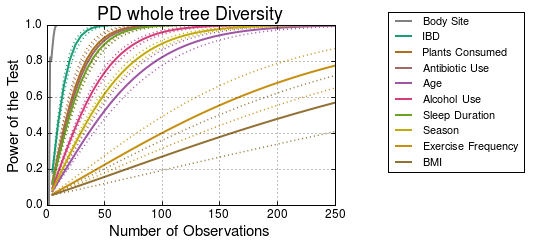

In [41]:
# Plots the power curve figure
alpha_fig = pp.plot_effects(effect_means=a_eff_means[plot_order],
                            effect_bounds=a_eff_bounds[plot_order],
                            labels=labels[plot_order + 1],
                            sample_counts=plot_counts,
                            colormap=plot_colormap,
                            title=a_title,
                            legend_size=legend_size)
# Adds the body site figure
pp.add_average_trace(alpha_fig, all_a_pwr, all_a_cnts, 
                     labels[np.hstack((0, plot_order+1))],
                     legend_pad=space_position,
                     figure_size=figure_size,
                     legend_position=legend_position)

# Saves the figure, if desired
if save_images:
    alpha_fig.savefig(image_pattern % a_suffix,
                      pad_inches=save_pad,
                      bbox_inches=save_bbox)

When we read the power curve, it relates the number of samples to the power, or the fraction of times we see a significant difference, based on the assumption there is a significant difference. Steeper curves, closer to the left of the plot, being to factors which have larger effects.
In these plots, we’ve chosen to represent the confidence interval around each power curve with dashed lines. We’d expect that in 95% of experiments, the number of samples needed to analyze the data would fall between these values, assuming we’ve selected a representative sample. Since we’re basing our results on the data we currently have, the effect may change as the population becomes more defined.

<a href="#top">Return to the top</a>

<a id="plot_beta"></a>
### Beta Diversity

We can also look at the power associated with unweighted UniFrac Distance.

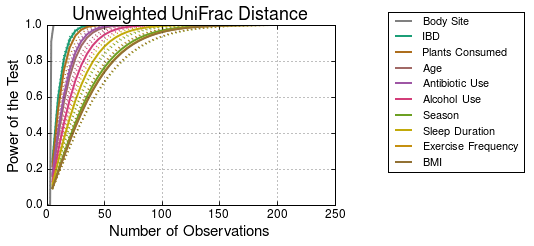

In [42]:
# Plots the power curve figure
beta_fig = pp.plot_effects(effect_means=b_eff_means[plot_order],
                           effect_bounds=b_eff_bounds[plot_order],
                           labels=labels[plot_order + 1],
                           sample_counts=plot_counts,
                           colormap=plot_colormap,
                           title=b_title,
                           legend_size=legend_size)
# Adds the body site figure
pp.add_average_trace(beta_fig, all_b_pwr, all_b_cnts, 
                     labels[np.hstack((0, b_order+1))],
                     legend_pad=space_position,
                     figure_size=figure_size,
                     legend_position=legend_position)

# Saves the figure, if desired
if save_images:
    beta_fig.savefig(image_pattern % b_suffix,
                      pad_inches=save_pad,
                      bbox_inches=save_bbox)

<a href="#top">Return to the top</a>

<a id="discussion"></a>
## Discussion

From our empirical effect size estimations, we can begin to rank effects of different factors on the microbiome. As demonstrated by the Human Microbiome Project (HMP), body site has the largest effect on the human microbiome [[24](#22699609)].

We find that an IBD diagnosis has one of the largest impacts on the gut microbiome. While dysbiosis in IBD is likely a complex relationship between the host genetics, host lifestyle, and the microbiome, the disease is characterized by a profoundly altered microbiome and intestinal inflammation [[13](#25307765)-[15](#25567118)]. As with IBD, the microbiome is considered strongly predictive of obesity [[16](#18407065), [17](#19043404), [28](#25538312)]. However, we find the effect of obesity on the microbiome is smaller than lifestyle factors like sleep and exercise for both alpha and beta diversity. This finding is corroborated, to some degree, by a recent meta analysis which observed consistent  IBD-related microbial signatures across studies while obesity-related dysbiosis was more strongly influence by technical effects [[13](#25307765)].

We might have predicted the difference in magnitude of these effects based gut pathology. IBD has been recognized as a disease of the intestines and a diagnosis is based on intestinal pathology [[29](#19653289), [30](#21530745)]. It’s likely the complex interactions of IBD-specific bacteria and bacterial strains and host inflammation shapes the community structure in a unique way. It seems less likely we will see such a strong disease-associated effect in conditions that do not traditionally have gut involvement. It might be more reasonable to expect they will have an effect size closer to obesity.

We also find that antibiotic use has a large effect on both alpha and beta diversity. This has been previously recognized [[10](#20736229)-[12](#20352091)]. Intuitively, it’s also not entirely unexpected; the goal of antibiotic treatment is  to kill bacteria. Therefore, a systemic dose of antibiotics will likely be associated  with off-target effects.

Among lifestyle factors, we see the one dietary variable, the number of types of plants consumed in a week, has the largest influence. This effect is larger than the effect of recent antibiotic use. Long term dietary patterns are known to have a strong effect on the microbiome [[6](#22797518)-[9](#24336217)]. In conjunction with this finding, we also observe that daily alcohol consumption has a smaller effect on the microbiome than plant consumption, or age, but a larger effect than obesity.<br>
We also found that sleep duration has a moderate effect. Individuals who sleep less six hours or less  each night have a less diverse, shifted gut microbiome than those who sleep more than eight hours per night. This effect is larger than the effect of obesity. Circadian dysfunction has been linked to obesity, although the mechanism frequently cited is a disruption of mammalian core clock genes [[31](#23434278)].<br>
Exercise is known to have an effect on the microbiome, and the effect of daily exercise, compared to those who exercise less than once a week, is noticeable, but small in the scheme of the effects investigated here [[32](#25021423), [33](#24670791)]. The effect of daily exercise on beta diversity is of the same order of magnitude as the effect of obesity, while the effect on alpha diversity is much larger.<br>

We also find strong effects associated with temporal variation. Changes in the microbiome at the extremes of the human lifespan - from early development to the effects of aging on the microbiome have been well studied [[3](#20668239)-[6](#22797518)]. The most extreme changes in the microbiome occur during the first three years of life; an infant’s microbiome is highly plastic and does not resemble an adult microbiome at the same site  [[3](#20668239), [4](#22699611), [34](#20566857)]. We see a strong effect of age in adults: age has almost as large an effect on beta diversity as antibiotic use, although the effect on alpha diversity is much smaller. 

We also see a seasonal effect, which was previously observed in a population of 60 matched samples [[19](#24618913)]. The effect of collection season on the microbiome is on the same order as the effect we see for sleep duration, and larger than the effect seen for obesity. This may encourage a shift in experiment design. At a minimum, it suggests that tracking collection date in human microbiome studies may be important.

Our power analysis allows us to rank the effect sizes of disease, lifestyle, and temporal factors on the human microbiome. We find that effect sizes are generally larger in beta diversity than in alpha diversity analyses, suggesting that most changes associated with the extreme states are caused by changes in the taxa present between the two states. A more concerning aspect to the power analysis, however, suggests that many cross-sectional microbiome studies currently in the literature are underpowered. We hope the effect size predictions here can serve as a guide for future studies, and encourage appropriate sample size selection.

<a href="#top">Return to the top</a>

<a id="refs"></a>
## References

1. <a id="17944619"></a>Nakagawa, S. and Cuthill, I.C. (2007) “[Effect size, confidence interval and statistical significance: a practical guide for biologists](http://www.ncbi.nlm.nih.gov/pubmed/17944619).” *Biol Rev Camb Philos Soc.* **82**: 591 - 605.   

2. <a id="23997866"></a>Sullivan, G.M. and Feninn, R. (2012) “[Using effect size - or why p value is not enough](http://www.ncbi.nlm.nih.gov/pubmed/23997866).” *J Grad Med Educ*. **4**: 279 - 282.   

3. <a id="20668239"></a>Koenig, J.E.; Spor, A.; Scalfone, N.; Fricker, A.D.; Stombaugh, J.; Knight, R.; Angenent, L.T.; and Ley, R.E. (2011). “[Succession of microbial consortia in the developing infant gut microbiome](http://www.ncbi.nlm.nih.gov/pubmed/20668239).</a>” *PNAS*. **108 Suppl 1**: 4578 - 4585.   

4. <a id="22699611"></a> Yatsunenko, T.; Rey, F.E.; Manary, M.J.; Trehan, I.; Dominguez-Bello, M.G.; Contreras, M.; Magris, M.; Hidalgo, G.; Baldassano, R.N.; Anokhin, A.P.; Heath, A.C.; Warner, B.; Rdder, J.; Kuczynski, J.; Caporaso, J.G.; Lozupone, C.A.; Lauber, C.; Clemente, J.C.; Knights, D.; Knight, R. and Gordon, J.I. (2012) “[Human Gut microbiome viewed across age and geography](http://www.ncbi.nlm.nih.gov/pubmed/20668239).” *Nature*. **486**: 222-227.   

5. <a id="20571116"></a>Claesson, M.J.; Cusacks, S.; O’Sullivan, O.; Greene-Diniz, R.; de Weerd, H.; Flannery, E.; Marchesi, J.R.; Falush, D.; Dinan, T.; Fitzgerald, G.; Stanton, C.; van Sinderen, D.; O’Connor, M.; Harnedy, N.; O’Connor, K.; Henry, C.; O’Mahony, D.; Fitzgerald, A.P.; Shananhan, F.; Twomey, C.; Hill, C.; Ross, R.P.; and O’Toole, P.W. (2011). [Composition, variability and temporal stability of the intestinal microbiota of the elderly](http://www.ncbi.nlm.nih.gov/pubmed/20571116).” *PNAS*. **108 Suppl 1**: 4586 - 4591.   

6. <a id="22797518"></a>Claesson, M.J.; Jeffery, I.B.; Conde, S.; Power, S.E.; O’Connor, E.M.; Cusack, S.; Harris, H.M.; Coakley, M.; Lakshminarayanan, B.; O’Sullivan, O.; Fitzgerald, G.F; Deane, J.; O’Connor, M.; Harnedy, N.; O’Connor, K.; O’Mahony, D.; van Sinderen, D.; Wallace, M.; Brennan, L.; Stanton, C.; Marchesi, J.R.; Fitzgerald, A.P.; Shanahan, F.; Hill, C.; Ross, R.P.; and O’Toole, P.W. (2012). “[Gut microbiota composition correlates with diet and health in the elderly](http://www.ncbi.nlm.nih.gov/pubmed/22797518).” *Nature*. **488**: 178-184.   

7. <a id="21596990"></a>Muegge, B.D.; Kuczynski, J.; Knights, D.; Clemente, J.C.; Gonzalez, A.; Fontana, L.; Henrissat, B.; Knight, R.; and Gordon, J.I. (2011) “[Diet drive convergence in gut microbiome functions across mammalian phylogeny and within humans](http://www.ncbi.nlm.nih.gov/pubmed/21596990).” *Science*. **332**: 970 - 974.   

8. <a id="21885731"></a>Wu, G.D.; Chen, J.; Hoffmann, C.; Bittinger, K.; Chen, Y.Y.; Keilbaugh, S.A.; Bewtra, M.; Knights, D.; Walters, W.A.; Knight, R.; Sinah, R.; Gupta, K.; Baldassano, R.; Nessel, L.; Li, H.; Bushman, F.D.; Lewis, J.D. (2011) “<a href="http://www.ncbi.nlm.nih.gov/pubmed/21885731">Linking long-term dietary patterns with gut microbiome enterotypes.</a>” *Science*. **334**: 105-108.   

9. <a id="24336217"></a>David, L.A.; Maurice, C.F.; Carmondy, R.N.; Gottenberg, D.B.; Button, J.E.; Wolfe, B.E.; Ling, A.V.; Devlin, A.S.; Varma, Y.; Fischbach, M.A.; Biddinger, S.B.; Button, R.J.; Turnbaugh, P.J. “[Diet rapidly and reproducibly alters the human gut microbiome](http://www.ncbi.nlm.nih.gov/pubmed/24336217).” *Nature*. **505**: 559-563.

10. <a id="20736229"></a>Manichanh, C.; Reeder, J.; Gibert, P.; Varela, E.; Llopis, M.; Antolin, M.; Guigo, R.; Knight, R.; Gaurner, F. (2010) “[Reshaping the gut microbiome with bacterial transplantation and antibiotic intake](http://www.ncbi.nlm.nih.gov/pubmed/20736229).” *Genome Res*. **20**: 1411 - 1419.

11. <a id="20847294"></a>Dethlefsen, L. and Relman, D.A. (2011) “[Incomplete recovery and individualized responses of the human distal gut microbiota to repeated antibiotic perturbation](http://www.ncbi.nlm.nih.gov/pubmed/20847294).” *PNAS*. **108 Suppl 1**: 4554-4561.

12. <a id="20352091"></a>Jakobsson, H.E.; Jernberg, C.; Andersson, A.F.; Sjölund-Karlsson, M; Jansson, J.K.; and Engstrand, L. (2010). “[Short-term antibiotic treatment has differing long-term impacts on the human throat and gut microbiome](http://www.ncbi.nlm.nih.gov/pubmed/20352091).” *PLoS One*. **5**: e9836.

13. <a id="25307765"></a>Walters, W.A.; Zu, Z.; and Knight, R. (2014) "[Meta-analysis of human gut microbes associated with obesity and IBD](http://www.ncbi.nlm.nih.gov/pubmed/25307765).” *FEBS Letters*. **588**: 4223-4233.

15. <a id="25587358"></a>Knights, D.; Silverberg, M.S.; Weersma, R.K.; Gevers, D.; Dijkstra, G.; Huang, H.; Tyler, A.D.; von Sommeren, S.; Imhann, F.; Stempak, J.M.; Huang, H.; Vangay, P.; Al-Ghalith, G.A.; Russell, C.; Sauk, J.; Knight, J.; Daly, M.J.; Huttenhower, C.; and Xavier, R.J. (2014). "[Complex host genetics influence the microbiome in inflammatory bowel disease](http://www.ncbi.nlm.nih.gov/pubmed/25587358)." *Genome Med*. **6**: 107.

15. <a id="25567118"></a>Rehman, A.; Rausch, P.; Wang, J.; Skieceviciene, J.; Kiudelis, G.; Bhagalia, K.; Amarapurkar, D.; Kupcinskas, L.; Schreiber, S.; Rosenstiel, P.; Baines, J.F.; and Ott, S. (2015). "[Geographical patterns of the standing and active human gut microbiome in health and IBD](http://www.ncbi.nlm.nih.gov/pubmed/25567118)." *Gut*. doi: 10.1136/gutjnl-2014-308341

16. <a id="18407065"></a>Turnbaugh, P.J.; Bäckhed, F.; Fulton, L.; and Gordon, J.I. (2008). “[Diet-induced obesity is linked to marked but reversible alterations in the mouse distal gut microbiome](http://www.ncbi.nlm.nih.gov/pubmed/18407065).” *Cell Host Microbe.* **3**: 213 - 223. 

17. <a id="19043404 "></a>Turnbaugh, P.J.; Hamady, M.; Yatsunenko, T.; Cantarel, B.L.; Duncan, A.; Ley, R.E.; Sogin, M.L.; Jones, W.J.; Roe, B.A.; Affourtit, J.P.; Egholm, M.; Henrissat, B.; Knight, R.; and Gordon, J.I. (2009). "[A core gut microbiome in obese and lean twins](http://www.ncbi.nlm.nih.gov/pubmed/19043404)." *Nature.* **457**: 480 - 484.

18. <a id="24009397"></a>Ridaura, V.K.; Faith, J.J.; Rey, F.E.; Cheng, J.; Duncan, A.E.; Kau, A.L.; Griffin, N.W.; Lombard, V.; Henrissat, B.; Bain, J.R.; Muehlbauer, M.J.; Ilkayeva, O.; Semenkovich, C.F.; Funai, K.; Hayashi, D.K.; Lyle, B.J.; Martini, M.C.; Ursell, L.K.; Clemente, J.C.; Van Treuren, W.; Walters, W.A.; Knight, R.; Newgard, C.B.; Heath, A.C.; and Gordon, J.I. (2013). "[Gut microbiota from twins discordant for obesity modulate metabolism in mice](http://www.ncbi.nlm.nih.gov/pubmed/24009397)." *Science*. **341**: 1241214.

19. <a id="24618913"></a>Davenport, E.R.; Mizrahi-Man, O.; Michelini, K.; Barreiro, L.B.; Ober, C.; Gilad, Y. (2014). “[Seasonal Variation in human gut microbiome composition](http://www.ncbi.nlm.nih.gov/pubmed/24618913).” *PLoS One*. **9**:e90731. 

20. <a id="Cohen"></a>Cohen, J. (1988) “[The Analysis of Variance](http://www.lrdc.pitt.edu/schneider/p2465/Readings/Cohen,%201988%20(Statistical%20Power,%20273-406).pdf)”. *Statistical Power Analysis for the Behavioral Sciences*. Ch 8. Second Ed. Hillsdale: **Lawrence Erlbaum and Associates**. pp. 273 - 288.

21. <a id="Zar"></a>Zar, J. (1999) Biostatistical Analysis. Fourth Ed. Upper Saddle River: Prentice Hall. pp 185.

22. <a id="23284876"></a>La Rosa, P.S.; Brooks, J.P.; Deych, E.; Boone, E.L.; Edwards, D.J.; Wang, Q.; Sodergren, E.; Weinstock, G.; Shannon, W.D. (2012) “[Hypothesis testing and power calculations for taxonomic-based human microbiome data](http://www.ncbi.nlm.nih.gov/pubmed/23284876).” *Plos One*. **7**:e52078.

23. <a id="Bondini"></a>Bondini, M.E.; Mielke, P.W.; Berry, K.J. (1988) "[Data-dependent permutation techniques for the analysis of ecological data](http://www.ndsu.edu/pubweb/~biondini/vita/0120_Vegetatio_1988_Biondini.pdf).” *Vegetatio*. **75**: 161-168. 

24. <a id="22699609"></a>The Human Microbiome Consortium. (2012) “[Structure, Function and diversity of the healthy human microbiome](http://www.ncbi.nlm.nih.gov/pubmed/22699609).” *Nature*. **486**: 207-214. 

25. <a id="15831718"></a>Eckburg, P.B.; Bik, E.M.; Bernstein C.N.; Purdom, E.; Dethlefson, L.; Sargent, M.; Gill, S.R.; Nelson, K.E.; Relman, D.A. (2005) “[Diversity of the human intestinal microbial flora.](http://www.ncbi.nlm.nih.gov/pubmed/15831718)” *Science*. **308**: 1635-1638

26. <a id="16332807"></a>Lozupone, C.; and Knight, R. (2005). “[UniFrac: a new phylogenetic method for comparing microbial communities](http://www.ncbi.nlm.nih.gov/pubmed/16332807).” *Appl Enviro Microbiol.* **71**: 8228-8235.

27. <a id="statsmodels"></a>Seabold. J.S. and Perktold. J. (2010). “Statsmodels: Econometric and Statistical Modeling in Python.” Proceedings of the 9th Python in Science Conference. 

28. <a id=""></a>Hartstra, A.V.; Bouter, K.E.; Bäckhed, F.; Nieuwdorp, M. (2015) "[Insights into the role of the microbiome in obesity and type 2 diabetes.](http://www.ncbi.nlm.nih.gov/pubmed/25538312)" *Diabetes Care*. **38**: 159-165.

29. <a id="19653289"></a>Bernstein, C.N.; Fried, M.; Krabshuis, J.H.; Cohen, H.; Eliakim, R.; Fedail, S.; Gearry, R.; Goh, K.L.; Hamid, S.; Khan, A.G.; LeMair, A.W.; Malfertheiner, Ouyang, Q.; Rey, J.F.; Sood, A.; Steinwurz, F.; Thomsen, O.O.; Thomson, A; and Watermeyer, G. (2010). “[World Gastroenterology Organization Practice Guidelines for the diagnosis and management of IBD in 2010](http://www.ncbi.nlm.nih.gov/pubmed/19653289).” *Inflamm Bowel Dis*. **16**: 112-124. 

30. <a id="21530745"></a>Cosnes, J.; Gower-Rousseau, C.; Seksik, P.; Cortot, A. (2011). “[Epidemiology and natural history of inflammatory bowel disease](http://www.ncbi.nlm.nih.gov/pubmed/21530745).” *Gastroenterology*. **140**: 1785 - 1794.

31. <a id="23434278"></a>Shi, S.Q.; Ansari, T.S.; McGuinness, O.P.; Wasserman, D.H.; and Johnson, C.H. (2013). “[Circadian disruption leads to insulin resistance and obesity](http://www.ncbi.nlm.nih.gov/pubmed/23434278).” *Curr Biol.* **23**: 372 - 381.

32. <a id="25021423"></a>Clarke, S.F.; Murphy, E.F.; O’Sullivan, O.; Lucey, A.J.; Humphreys, M.; Hogan, A.; Hayes, P.; O’Reilly, M.; Jeffery, I.B.; Wood-Martin, R.; Kerins, D.M.; Quigley, E.; Ross, R.P.; O’Toole, P.W.; Molloy, M.G.; Falvey, E.; Shanahan, F.; and Cotter, P.D. “[Exercise and associated dietary extremes impact on gut microbial diversity](http://www.ncbi.nlm.nih.gov/pubmed/25021423).” *Gut*. **63**: 1913-1920. 

33. <a id="24670791"></a>Evans, C.C.; LePard, K.J.; Kwak, J.W.; Stancukas, M.C.; Laskowski, S.; Dougherty, J.; Moulton, L.; Glawe, A.; Wang, Y.; Leone, V.; Antonpoulos, D.A.; Smith, D.; Chang, E.B.; and Ciancio, M.J. (2014). “[Exercise prevents weight gain and alters the gut microbiota in a mouse model of high fat diet-induced obesity](http://www.ncbi.nlm.nih.gov/pubmed/24670791).” *PLoS One*. **9**: e92193.

34. <a id="20566857"></a>Dominguez-Bello, M.G.; Costello, E.K.; Contreras, M.; Magris, M.; Hidalgo, G.; Fierer, N.; and Knight, R. (2010). “[Delivery mode shapes the acquisition and structure of the initial microbiota across multiple body habitats in newborns](http://www.ncbi.nlm.nih.gov/pubmed/20566857).” *PNAS*. **107**: 11971-11975.


<a href="#top">Return to the top</a>